In [1]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [9]:
 train_data=keras.utils.image_dataset_from_directory(
     directory="D:/AI course ppts Arfa Karim Foundation/datasets/pets/train",
     labels="inferred",
     label_mode="int",
     image_size=(256,256),
     batch_size=32,
     shuffle=False)   

Found 132 files belonging to 2 classes.


In [11]:
test_data=keras.utils.image_dataset_from_directory(
    directory="D:/AI course ppts Arfa Karim Foundation/datasets/pets/test",
    labels="inferred",
    label_mode="int",
    image_size=(256,256),
    batch_size=32,
    shuffle=True)


Found 70 files belonging to 2 classes.


tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[[[ 89.2551   129.2551    41.255096]
  [ 98.41911  138.41911   49.419113]
  [ 90.38081  130.38081   41.380814]
  ...
  [ 70.83203  109.83203   29.171967]
  [ 74.396484 111.396484  34.396484]
  [ 78.5574   115.5574    38.557404]]

 [[ 88.107895 128.1079    39.281723]
  [ 93.86038  133.86038   44.860382]
  [ 92.84152  133.6677    42.18918 ]
  ...
  [ 67.73047  106.73047   27.597382]
  [ 75.272964 113.09914   36.099136]
  [ 75.18002  113.006195  36.006195]]

 [[ 84.29883  124.29883   35.29883 ]
  [ 86.49219  126.86914   36.73828 ]
  [ 91.54469  132.5447    40.544693]
  ...
  [ 69.36937  108.36937   29.36937 ]
  [ 70.51381  108.51381   31.51381 ]
  [ 69.29692  107.29692   30.29692 ]]

 ...

 [[124.96207  175.58511   50.092926]
  [119.05788  169.41321   44.45645 ]
  [ 97.39638  147.39638   23.627304]
  ...
  [ 90.57869  142.57869   31.57869 ]
  [ 81.461075 135.46107   24.461075]
  [ 84.146484 138.14648   27.146484]]

 [[102.6481   153.73909   2

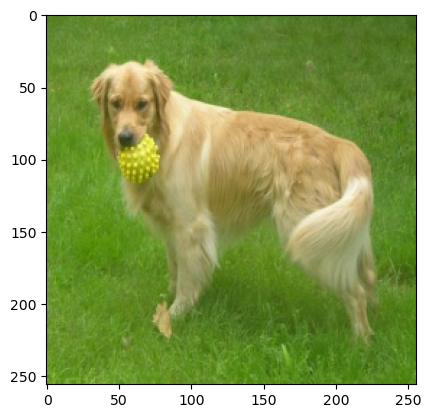

In [12]:
for images, labels in test_data:
    img=images[0]
    label=labels[0]
    print(label)
    print(img)
    plt.imshow(img.numpy().astype("uint8"))
    
    break
    

In [13]:
model=Sequential()

In [14]:
#make 1 convolutional layer
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(256,256,3), padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(32, kernel_size=(3,3), padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

#add flatten, hidden, output layer
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

C:\Users\AR COMPUTER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,755,425 (60.10 MB)

 Trainable params: 15,755,425 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

## simple Artificial Neural network

In [17]:
model2=Sequential()
model2.add(Flatten(input_shape=(256,256,3)))
model2.add(Dense(128, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 196608)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      25,165,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,166,081 (96.00 MB)

 Trainable params: 25,166,081 (96.00 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
##model2 has more trainable params but model has less 15M due to convo2d and max pooling

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
def process(img,label):
    img=tf.cast(img/255, tf.float32)
    return img, label
    

In [21]:
train_ds=train_data.map(process)

In [22]:
test_ds=test_data.map(process)

In [23]:
model.fit(train_ds,epochs=10, validation_data=test_ds)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 886ms/step - accuracy: 0.3260 - loss: 17.5654 - val_accuracy: 0.5000 - val_loss: 2.4163
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 745ms/step - accuracy: 0.2995 - loss: 3.4572 - val_accuracy: 0.5000 - val_loss: 1.0616
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 718ms/step - accuracy: 0.2995 - loss: 1.3963 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 803ms/step - accuracy: 0.3129 - loss: 0.7350 - val_accuracy: 0.5286 - val_loss: 0.6888
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 724ms/step - accuracy: 0.4077 - loss: 0.6775 - val_accuracy: 0.5000 - val_loss: 0.6880
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 714ms/step - accuracy: 0.3641 - loss: 0.6814 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 735ms/step - accuracy: 0.4821 - loss: 0.6627 - val_accuracy: 0.5714 - val_loss: 0.6882
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 681ms/step - accuracy: 0.6223 - loss: 0.6017 - val_accuracy: 0.5857 - val_loss

In [24]:
img=cv2.imread('cat.jpg')

In [25]:
img.shape

(500, 431, 3)

In [26]:
resized=cv2.resize(img, (256,256))

In [27]:
resized.shape

(256, 256, 3)

In [28]:
img=resized/255

In [31]:
required_img=img.reshape(1, 256,256,3)

In [33]:
model.predict(required_img)


#model answers probabilty of an img being cat
#prob>0.5= cat
#prob<0.5= dog

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


array([[0.45436558]], dtype=float32)

In [35]:
for images, labels in test_data:
    prediction=model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


In [36]:
prediction

array([[1.       ],
       [1.       ],
       [0.9838231],
       [1.       ],
       [1.       ],
       [1.       ]], dtype=float32)

In [37]:
#it is giving only last batch prediction

## finding model predictions for all batches

In [42]:
pred=[]
for images, labels in test_data:
    prediction=model.predict(images)
    for i in prediction:
        if i<0.5:
            pred.append(1)
        if i>0.5:
            pred.append(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [43]:
len(pred)

70

In [48]:
label=[]
for images, labels in test_data:
    label.extend(labels.numpy().tolist()) #batch wise extension
    

In [49]:
len(label)

70

In [50]:
from sklearn.metrics import accuracy_score, precision_score

In [51]:
accuracy_score(pred, label)

0.5571428571428572

In [52]:
precision_score(pred, label)

0.2857142857142857

In [ ]:
#how to improve accuracy
#original large dataset
#epochs increase
#add more layers to your network